## 전처리된 파일 불러오기

In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("Y_train.csv")

In [3]:
X_train.shape, X_test.shape , y_train.shape

((891, 22), (418, 22), (891, 1))

## 앙상블 모델 사용하기
- 머신러닝에서 성능이 좋은 모델
- 여러개의 Decision Tree를 활용하는 모델

### randomForest 모델 사용

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
# 모델생성
forest_model = RandomForestClassifier()

In [6]:
import warnings
warnings.filterwarnings('ignore')

### 교차검증

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_model, X_train , y_train, cv =5).mean()

0.8013558470905782

### 학습

In [8]:
#모델학습
forest_model.fit(X_train, y_train)

RandomForestClassifier()

### 모델 평가

In [9]:
# 학습한 모델로 예측
pred = forest_model.predict(X_test)
# 평가결과 답안지에 예측한 값 넣기
sub = pd.read_csv("./data/titanic/gender_submission.csv")
sub['Survived'] = pred
# 예측한 값 내보내기

In [10]:
sub.to_csv("my_answer03.csv" , index= False)

## 그리드를 통한 하이퍼 파라미터 튜닝

In [11]:
# 하이퍼 파라미터 튜닝
# GridSearchCV
# n_estimators = [50, 70 ,90 ,110 ,130, 150]
# max_depth = [3,4,5,6,7,8]
# max_features =[0.3, 0.4, 0.5, 0.6, 0.7]

In [25]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [3,4,5,6,7,8],
    'max_features': [0.3, 0.4, 0.5, 0.6, 0.7]
}
dtc = RandomForestClassifier() 
grid_tree = GridSearchCV(dtc , param_grid = params, cv= None
            ,refit =True)
# 사용할 모델 : randomForest
# param_grid : 사용할 딕셔너리 , 여기서는 최대깊이와 최대 특성 개수
# cv = 몇개로 나눌건지 
# refit : True 또는 문자열, True가 기본값

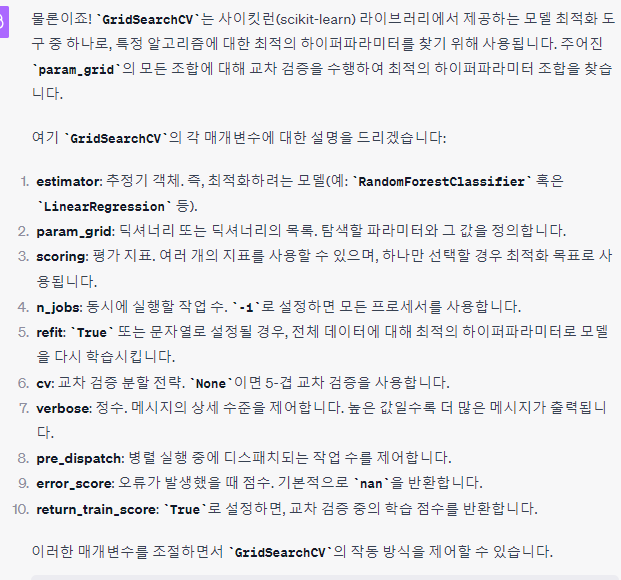

In [26]:
grid_tree

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.3, 0.4, 0.5, 0.6, 0.7]})

In [27]:
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.3, 0.4, 0.5, 0.6, 0.7]})

In [28]:
print('최고의 파라미터:' , grid_tree.best_params_)
print('최고 점수', grid_tree.best_score_)

최고의 파라미터: {'max_depth': 8, 'max_features': 0.5}
최고 점수 0.8294206264515724


In [29]:
# em : estimate(추정치)
em = grid_tree.best_estimator_ # 최고의 파라미터와 동일
pred = em.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
# 정확도 확인, 캐글 경진대회에 잇으니 불가
from sklearn.metrics import accuracy_score
# accuracy_score(y_test, pred)

In [30]:
sub = pd.read_csv("./data/titanic/gender_submission.csv")
sub['Survived'] = pred

In [32]:
sub.to_csv("grid_search.csv", index= False)